In [2]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [3]:
samples_4mu = [
    "TTJets",
    
    "4mu_1000GeV_0p25GeV_0p002mm",
    "4mu_1000GeV_0p25GeV_0p02mm",
    "4mu_1000GeV_0p25GeV_0p2mm",
    "4mu_1000GeV_0p25GeV_1p0mm",
    "4mu_1000GeV_0p25GeV_2p0mm",

    "4mu_1000GeV_1p2GeV_0p0096mm",
    "4mu_1000GeV_1p2GeV_0p096mm",
    "4mu_1000GeV_1p2GeV_0p96mm",
    "4mu_1000GeV_1p2GeV_4p8mm",
    "4mu_1000GeV_1p2GeV_9p6mm",

    "4mu_1000GeV_5p0GeV_0p04mm",
    "4mu_1000GeV_5p0GeV_0p4mm",
    "4mu_1000GeV_5p0GeV_4p0mm",
    "4mu_1000GeV_5p0GeV_20p0mm",
    "4mu_1000GeV_5p0GeV_40p0mm",

    "4mu_100GeV_0p25GeV_0p02mm",
    "4mu_100GeV_0p25GeV_0p2mm",
    "4mu_100GeV_0p25GeV_2p0mm",
    "4mu_100GeV_0p25GeV_10p0mm",
    "4mu_100GeV_0p25GeV_20p0mm",
    
    "4mu_100GeV_1p2GeV_0p096mm",
    "4mu_100GeV_1p2GeV_0p96mm",
    "4mu_100GeV_1p2GeV_9p6mm",
    "4mu_100GeV_1p2GeV_48p0mm",
    "4mu_100GeV_1p2GeV_96p0mm",
    
    "4mu_100GeV_5p0GeV_0p4mm",
    "4mu_100GeV_5p0GeV_4p0mm",
    "4mu_100GeV_5p0GeV_40p0mm",
    "4mu_100GeV_5p0GeV_200p0mm",
    "4mu_100GeV_5p0GeV_400p0mm",
    
    "4mu_150GeV_0p25GeV_0p013mm",
    "4mu_150GeV_0p25GeV_0p13mm",
    "4mu_150GeV_0p25GeV_1p3mm",
    "4mu_150GeV_0p25GeV_6p7mm",
    "4mu_150GeV_0p25GeV_13p0mm",
    
    "4mu_150GeV_1p2GeV_0p064mm",
    "4mu_150GeV_1p2GeV_0p64mm",
    "4mu_150GeV_1p2GeV_6p4mm",
    "4mu_150GeV_1p2GeV_32p0mm",
    "4mu_150GeV_1p2GeV_64p0mm",
   
    "4mu_150GeV_5p0GeV_0p27mm",
    "4mu_150GeV_5p0GeV_2p7mm",
    "4mu_150GeV_5p0GeV_27p0mm",
    "4mu_150GeV_5p0GeV_130p0mm",
    "4mu_150GeV_5p0GeV_270p0mm",
    
    "4mu_200GeV_0p25GeV_0p01mm",
#    "4mu_200GeV_0p25GeV_0p1mm", # LZMAError: Corrupt input data
    "4mu_200GeV_0p25GeV_1p0mm",
    "4mu_200GeV_0p25GeV_5p0mm",
    "4mu_200GeV_0p25GeV_10p0mm",
    
    "4mu_200GeV_1p2GeV_0p048mm",
    "4mu_200GeV_1p2GeV_0p48mm",
    "4mu_200GeV_1p2GeV_4p8mm",
    "4mu_200GeV_1p2GeV_24p0mm",
    "4mu_200GeV_1p2GeV_48p0mm",
    
    "4mu_200GeV_5p0GeV_0p2mm",
    "4mu_200GeV_5p0GeV_2p0mm",
    "4mu_200GeV_5p0GeV_20p0mm",
    "4mu_200GeV_5p0GeV_100p0mm",
    "4mu_200GeV_5p0GeV_200p0mm",

    "4mu_500GeV_0p25GeV_0p004mm",
    "4mu_500GeV_0p25GeV_0p04mm",
    "4mu_500GeV_0p25GeV_0p4mm",
    "4mu_500GeV_0p25GeV_2p0mm",
    "4mu_500GeV_0p25GeV_4p0mm",
    
    "4mu_500GeV_1p2GeV_0p019mm",
    "4mu_500GeV_1p2GeV_0p19mm",
    "4mu_500GeV_1p2GeV_1p9mm",
    "4mu_500GeV_1p2GeV_9p6mm",
    "4mu_500GeV_1p2GeV_19p0mm",
    
    "4mu_500GeV_5p0GeV_0p08mm",
    "4mu_500GeV_5p0GeV_0p8mm",
    "4mu_500GeV_5p0GeV_8p0mm",
    "4mu_500GeV_5p0GeV_40p0mm",
    "4mu_500GeV_5p0GeV_80p0mm",
    
    "4mu_800GeV_0p25GeV_0p0025mm",
    "4mu_800GeV_0p25GeV_0p025mm",
    "4mu_800GeV_0p25GeV_0p25mm",
    "4mu_800GeV_0p25GeV_1p2mm",
    "4mu_800GeV_0p25GeV_2p5mm",
    
    "4mu_800GeV_1p2GeV_0p012mm",
    "4mu_800GeV_1p2GeV_0p12mm",
    "4mu_800GeV_1p2GeV_1p2mm",
    "4mu_800GeV_1p2GeV_6p0mm",
    "4mu_800GeV_1p2GeV_12p0mm",
    
    "4mu_800GeV_5p0GeV_0p05mm",
    "4mu_800GeV_5p0GeV_0p5mm",
    "4mu_800GeV_5p0GeV_5p0mm",
    "4mu_800GeV_5p0GeV_25p0mm",
    "4mu_800GeV_5p0GeV_50p0mm"
    

]

In [4]:

samples_2mu = [
    '2mu2e_500GeV_5p0GeV_0p08mm',
    '2mu2e_500GeV_5p0GeV_0p8mm',
    '2mu2e_500GeV_5p0GeV_8p0mm',
    '2mu2e_500GeV_5p0GeV_40p0mm',
    '2mu2e_500GeV_5p0GeV_80p0mm',
]


samples_4mu = [
    #"TTJets",

#    '2mu2e_500GeV_5p0GeV_0p08mm',
#    '2mu2e_500GeV_5p0GeV_0p8mm',
#    '2mu2e_500GeV_5p0GeV_8p0mm',
#    '2mu2e_500GeV_5p0GeV_40p0mm',
#    '2mu2e_500GeV_5p0GeV_80p0mm',
    
    '4Mu_500GeV_5p0GeV_0p08mm',
    # '4mu_500GeV_5p0GeV_0p8mm',
    # '4mu_500GeV_5p0GeV_8p0mm',
    # '4mu_500GeV_5p0GeV_40p0mm',
    # '4mu_500GeV_5p0GeV_80p0mm',

]

In [5]:
fileset = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=2, location_cfg="signal_4mu_v10.yaml")
# fileset = utilities.make_fileset(samples_4mu, "signal_4mu_v10", max_files=2)

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)

channels = ["base", "2mu2e", "4mu"]
p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
    #lj_reco_choices=["0.4"],
    #llpnanoaod=True,
)

output = runner.run(fileset, treename="Events", processor_instance=p)
out = output["out"]

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: divide by zero 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

Signal not in xs cfg, assuming 1fb


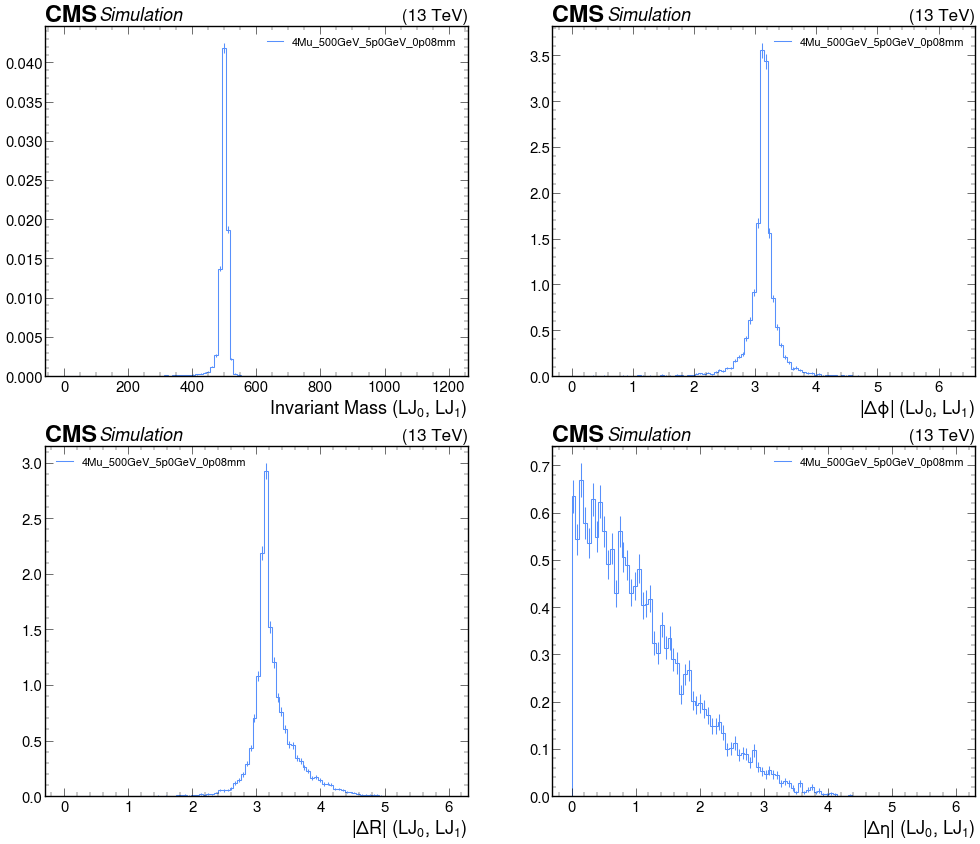

In [6]:
plt.subplots(2,2,figsize=(24,20))
plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_lj_invmass"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})
plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_lj_absdphi"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_lj_absdR"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})
plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_lj_absdeta"][channels[0], :], flow='none', density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

In [7]:
BKG = output["out"][samples_4mu[0]]["hists"]
SIG_1 = output["out"][samples_4mu[1]]["hists"]
SIG_2 = output["out"][samples_4mu[2]]["hists"]
SIG_3 = output["out"][samples_4mu[3]]["hists"]
SIG_4 = output["out"][samples_4mu[4]]["hists"]
SIG_5 = output["out"][samples_4mu[5]]["hists"]

nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("TTJets")

IndexError: list index out of range

In [ ]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1["lj_lj_absdphi_absdR"][channels[0], :, :])
plt.title("0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2["lj_lj_absdphi_absdR"][channels[0], :, :])
plt.title("0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3["lj_lj_absdphi_absdR"][channels[0], :, :])
plt.title("8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4["lj_lj_absdphi_absdR"][channels[0], :, :])
plt.title("40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5["lj_lj_absdphi_absdR"][channels[0], :, :])
plt.title("80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG["lj_lj_absdphi_absdR"][channels[0], :, :])
plt.title("TTJets")

In [ ]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1["lj_lj_absdphi_absdeta"][channels[0], :, :])
plt.title("0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2["lj_lj_absdphi_absdeta"][channels[0], :, :])
plt.title("0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3["lj_lj_absdphi_absdeta"][channels[0], :, :])
plt.title("8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4["lj_lj_absdphi_absdeta"][channels[0], :, :])
plt.title("40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5["lj_lj_absdphi_absdeta"][channels[0], :, :])
plt.title("80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG["lj_lj_absdphi_absdeta"][channels[0], :, :])
plt.title("TTJets")

In [ ]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1["lj_lj_absdR_absdeta"][channels[0], :, :])
plt.title("0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2["lj_lj_absdR_absdeta"][channels[0], :, :])
plt.title("0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3["lj_lj_absdR_absdeta"][channels[0], :, :])
plt.title("8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4["lj_lj_absdR_absdeta"][channels[0], :, :])
plt.title("40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5["lj_lj_absdR_absdeta"][channels[0], :, :])
plt.title("80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG["lj_lj_absdR_absdeta"][channels[0], :, :])
plt.title("TTJets")

In [ ]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("TTJets")

In [ ]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1["lj_lj_absdeta_invmass"][channels[0], :, :])
plt.title("0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2["lj_lj_absdeta_invmass"][channels[0], :, :])
plt.title("0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3["lj_lj_absdeta_invmass"][channels[0], :, :])
plt.title("8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4["lj_lj_absdeta_invmass"][channels[0], :, :])
plt.title("40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5["lj_lj_absdeta_invmass"][channels[0], :, :])
plt.title("80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG["lj_lj_absdeta_invmass"][channels[0], :, :])
plt.title("TTJets")